In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\khali\DATA SCIENCE FILES\hotel_bookings.csv")

In [3]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [4]:
data.shape

(119390, 32)

In [5]:
data.isnull().values.any()

True

In [6]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
data.fillna(0,inplace = True )

In [8]:
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [11]:
data['meal'].value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [14]:
data['children'].unique()

array([ 0.,  1.,  2., 10.,  3.])

In [15]:
data['adults'].unique()

array([ 2,  1,  3,  4, 40, 26, 50, 27, 55,  0, 20,  6,  5, 10],
      dtype=int64)

In [16]:
data['babies'].unique()

array([ 0,  1,  2, 10,  9], dtype=int64)

In [20]:
filter = (data['children'] == 0) & (data['adults'] == 0) & (data['babies'] == 0)
data[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [22]:
data[~filter].head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [23]:
resort = data[(data['hotel']=='Resort Hotel') & (data['is_canceled']==0)]
city = data[(data['hotel']=='City Hotel') & (data['is_canceled']==0)]

In [24]:
resort.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [25]:
city.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40060,City Hotel,0,6,2015,July,27,1,0,2,1,...,No Deposit,6.0,0.0,0,Transient,0.00,0,0,Check-Out,7/3/2015
40066,City Hotel,0,3,2015,July,27,2,0,3,1,...,No Deposit,1.0,0.0,0,Transient-Party,58.67,0,0,Check-Out,7/5/2015
40070,City Hotel,0,43,2015,July,27,3,0,2,2,...,No Deposit,1.0,0.0,0,Transient-Party,86.00,0,0,Check-Out,7/5/2015
40071,City Hotel,0,43,2015,July,27,3,0,2,2,...,No Deposit,1.0,0.0,0,Transient-Party,43.00,0,0,Check-Out,7/5/2015
40072,City Hotel,0,43,2015,July,27,3,0,2,2,...,No Deposit,1.0,0.0,0,Transient-Party,86.00,0,0,Check-Out,7/5/2015


In [27]:
resort.shape

(28938, 32)

In [28]:
import plotly.graph_objs as go 
from plotly.offline import iplot
import plotly.express as px

In [32]:
labels = resort['country'].value_counts().index
values = resort['country'].value_counts()

In [34]:
trace = go.Pie(labels = labels, values = values, hoverinfo = 'label+percent', textinfo = 'value')

In [38]:
iplot([trace])

In [40]:
country_wise_data = data[data['is_canceled']==0]['country'].value_counts().reset_index()

In [41]:
country_wise_data.columns = ['country','No of guests']

In [42]:
country_wise_data.head()

,country,No of guests
0,PRT,21071
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069


In [63]:
px.choropleth(country_wise_data,
              locations=country_wise_data['country'],
              color=country_wise_data['No of guests'],
              hover_name==country_wise_data['country'],
              title='Home country of gustes'
             )

SyntaxError: positional argument follows keyword argument (2987374654.py, line 6)

In [64]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [67]:
data2 = data[data['is_canceled']==0]

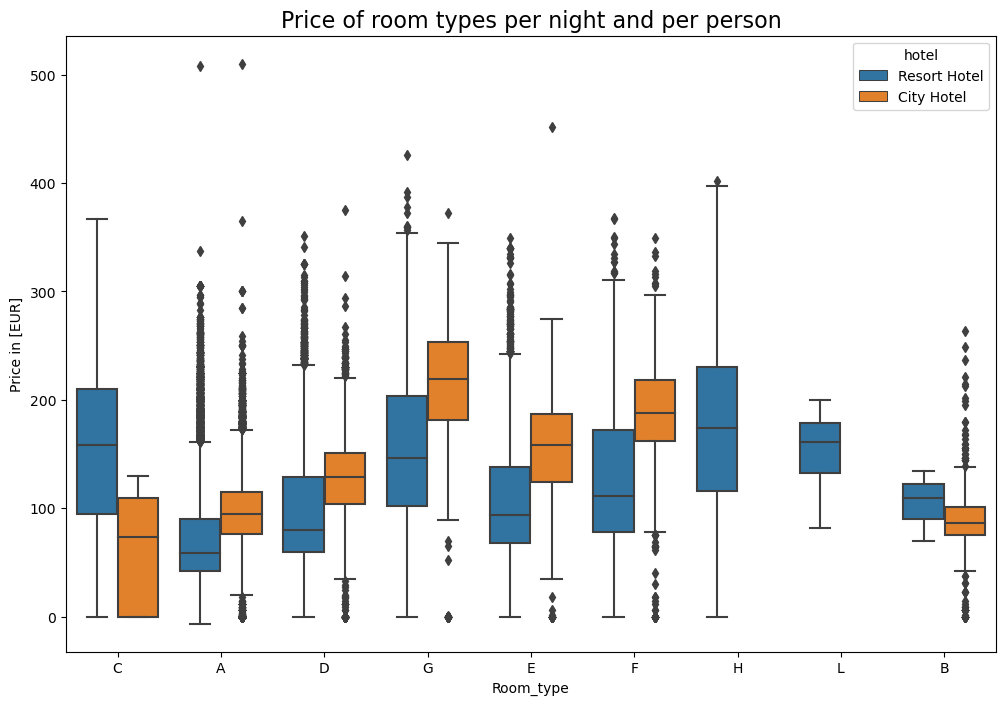

In [68]:
plt.figure(figsize = (12,8))
sns.boxplot(x= 'reserved_room_type', y= 'adr', data = data2, hue = 'hotel')
plt.title('Price of room types per night and per person', fontsize = 16)
plt.xlabel('Room_type')
plt.ylabel('Price in [EUR]')
plt.show()

In [69]:
data_resort=resort[resort['is_canceled']==0]
data_city=city[city['is_canceled']==0]

In [70]:
data_city.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40060,City Hotel,0,6,2015,July,27,1,0,2,1,...,No Deposit,6.0,0.0,0,Transient,0.00,0,0,Check-Out,7/3/2015
40066,City Hotel,0,3,2015,July,27,2,0,3,1,...,No Deposit,1.0,0.0,0,Transient-Party,58.67,0,0,Check-Out,7/5/2015
40070,City Hotel,0,43,2015,July,27,3,0,2,2,...,No Deposit,1.0,0.0,0,Transient-Party,86.00,0,0,Check-Out,7/5/2015
40071,City Hotel,0,43,2015,July,27,3,0,2,2,...,No Deposit,1.0,0.0,0,Transient-Party,43.00,0,0,Check-Out,7/5/2015
40072,City Hotel,0,43,2015,July,27,3,0,2,2,...,No Deposit,1.0,0.0,0,Transient-Party,86.00,0,0,Check-Out,7/5/2015


In [71]:
data_resort.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [78]:
resort_hotel = data_resort.groupby('arrival_date_month')['adr'].mean().reset_index()

In [76]:
city_hotel = data_city.groupby('arrival_date_month')['adr'].mean().reset_index()

In [77]:
city_hotel

,arrival_date_month,adr
0,April,111.856824
1,August,118.412083
2,December,87.856764
3,February,86.183025
4,January,82.160634
5,July,115.563810
6,June,117.702075
7,March,90.170722
8,May,120.445842
9,November,86.500456


In [79]:
resort_hotel

,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.322236
3,February,54.147478
4,January,48.708919
5,July,150.122528
6,June,107.921869
7,March,57.012487
8,May,76.657558
9,November,48.681640


In [83]:
final = resort_hotel.merge(city_hotel, on ='arrival_date_month')
final.columns = ['months','price_for_resort','price_for_city_hotel']

In [84]:
final.head()

,months,price_for_resort,price_for_city_hotel
0,April,75.867816,111.856824
1,August,181.205892,118.412083
2,December,68.322236,87.856764
3,February,54.147478,86.183025
4,January,48.708919,82.160634


In [92]:
!pip install sorted-months-weekdays
!pip install sort-dataframeby-monthorweek

  Using cached sorted_months_weekdays-0.2.tar.gz (2.7 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3223 sha256=d0ab6a49d0af18f51ba3f6b6fe50dc0595d318d9ecc470a0ae9215f1f3f5e3de
  Stored in directory: c:\users\khali\appdata\local\pip\cache\wheels\2a\70\02\2addaa9d5ffdc61dcd436a3c6eed123aea9053591367bcf584
Successfully built sorted-months-weekdays


In [94]:
import sort_dataframeby_monthorweek as sd

In [96]:
final2 = sd.Sort_Dataframeby_Month(final,'months')

In [97]:
final2.head()

,months,price_for_resort,price_for_city_hotel
0,January,48.708919,82.160634
1,February,54.147478,86.183025
2,March,57.012487,90.170722
3,April,75.867816,111.856824
4,May,76.657558,120.445842


In [100]:
px.line(final2, x ='months', y = ['price_for_resort','price_for_city_hotel'], title = 'Room price per night over the year')

In [101]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


<AxesSubplot:xlabel='market_segment', ylabel='stays_in_weekend_nights'>

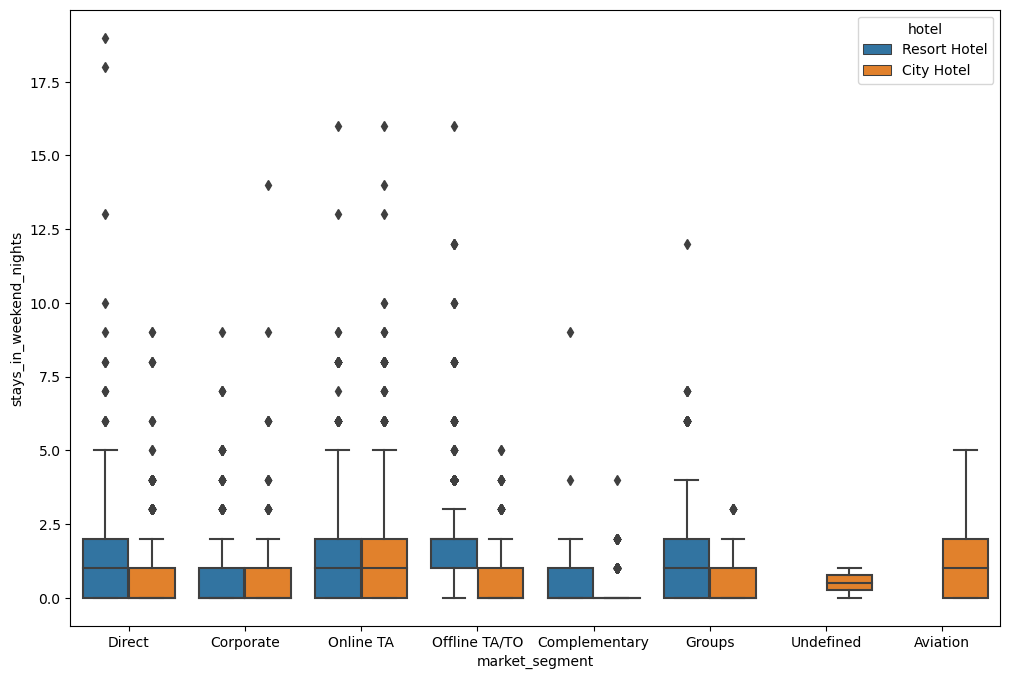

In [103]:
plt.figure(figsize=(12,8))
sns.boxplot(x='market_segment', y='stays_in_weekend_nights', data = data, hue='hotel')

In [104]:
data['meal'].value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [105]:
px.pie(data,values=data['meal'].value_counts(), names=data['meal'].value_counts().index, hole=0.5)

In [106]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


C:\Users\khali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='total_of_special_requests', ylabel='count'>

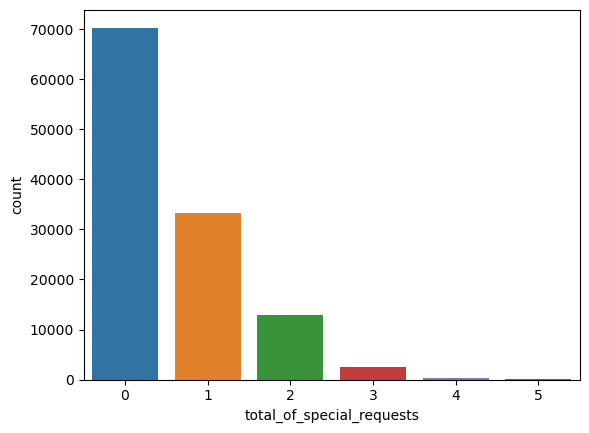

In [108]:
sns.countplot(data['total_of_special_requests'])

In [111]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [117]:
pivot = data.groupby(['total_of_special_requests','is_canceled']).agg({'total_of_special_requests':'count'}).rename(columns={'total_of_special_requests':'count'}).unstack()

<AxesSubplot:xlabel='total_of_special_requests'>

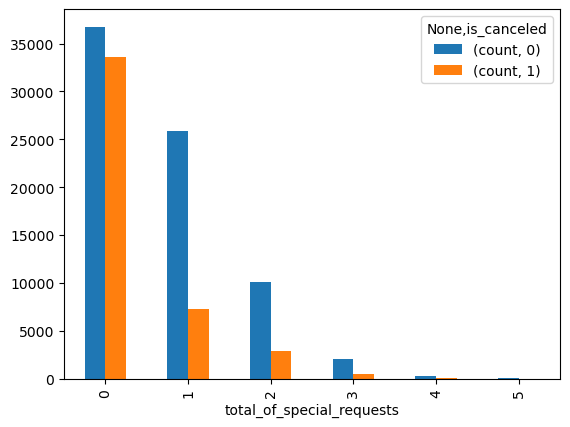

In [118]:
pivot.plot(kind='bar')

In [120]:
data_resort.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [124]:
rush_resort = data_resort['arrival_date_month'].value_counts().reset_index()
rush_resort.columns = ['months','no of guests']
rush_resort

,months,no of guests
0,August,3257
1,July,3137
2,October,2577
3,March,2573
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2038
9,December,2017


In [125]:
rush_city = data_city['arrival_date_month'].value_counts().reset_index()
rush_city.columns = ['months','no of guests']
rush_city

,months,no of guests
0,August,5381
1,July,4782
2,May,4579
3,June,4366
4,October,4337
5,September,4290
6,March,4072
7,April,4015
8,February,3064
9,November,2696


In [129]:
final_rush = rush_resort.merge(rush_city, on='months')

In [130]:
final_rush

,months,no of guests_x,no of guests_y
0,August,3257,5381
1,July,3137,4782
2,October,2577,4337
3,March,2573,4072
4,April,2550,4015
5,May,2535,4579
6,February,2308,3064
7,September,2102,4290
8,June,2038,4366
9,December,2017,2392


In [131]:
final_rush.columns = ['months','no of guests in resort','no of guests in city hotel']

In [133]:
final_rush

,months,no of guests in resort,no of guests in city hotel
0,August,3257,5381
1,July,3137,4782
2,October,2577,4337
3,March,2573,4072
4,April,2550,4015
5,May,2535,4579
6,February,2308,3064
7,September,2102,4290
8,June,2038,4366
9,December,2017,2392


In [136]:
final_rush2 = sd.Sort_Dataframeby_Month(df=final_rush,monthcolumnname='months')

In [137]:
final_rush2

,months,no of guests in resort,no of guests in city hotel
0,January,1868,2254
1,February,2308,3064
2,March,2573,4072
3,April,2550,4015
4,May,2535,4579
5,June,2038,4366
6,July,3137,4782
7,August,3257,5381
8,September,2102,4290
9,October,2577,4337


In [138]:
px.line(final_rush2,x='months',y=['no of guests in resort','no of guests in city hotel'], title='months with most rush')

In [139]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [140]:
filter=data['is_canceled']==0
clean_data=data[filter]

In [143]:
clean_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [149]:
clean_data['total_nights']=clean_data['stays_in_weekend_nights'] + clean_data['stays_in_week_nights']

In [150]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [151]:
clean_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015,2


In [156]:
stay = clean_data.groupby(['total_nights','hotel']).agg('count').reset_index()
stay = stay.iloc[:,0:3]  
stay.head()


,total_nights,hotel,is_canceled
0,0,City Hotel,308
1,0,Resort Hotel,372
2,1,City Hotel,9169
3,1,Resort Hotel,6580
4,2,City Hotel,10992


In [157]:
stay=stay.rename(columns={'is_canceled':'no of stays'})

In [158]:
stay.head()

,total_nights,hotel,no of stays
0,0,City Hotel,308
1,0,Resort Hotel,372
2,1,City Hotel,9169
3,1,Resort Hotel,6580
4,2,City Hotel,10992


<AxesSubplot:xlabel='total_nights', ylabel='no of stays'>

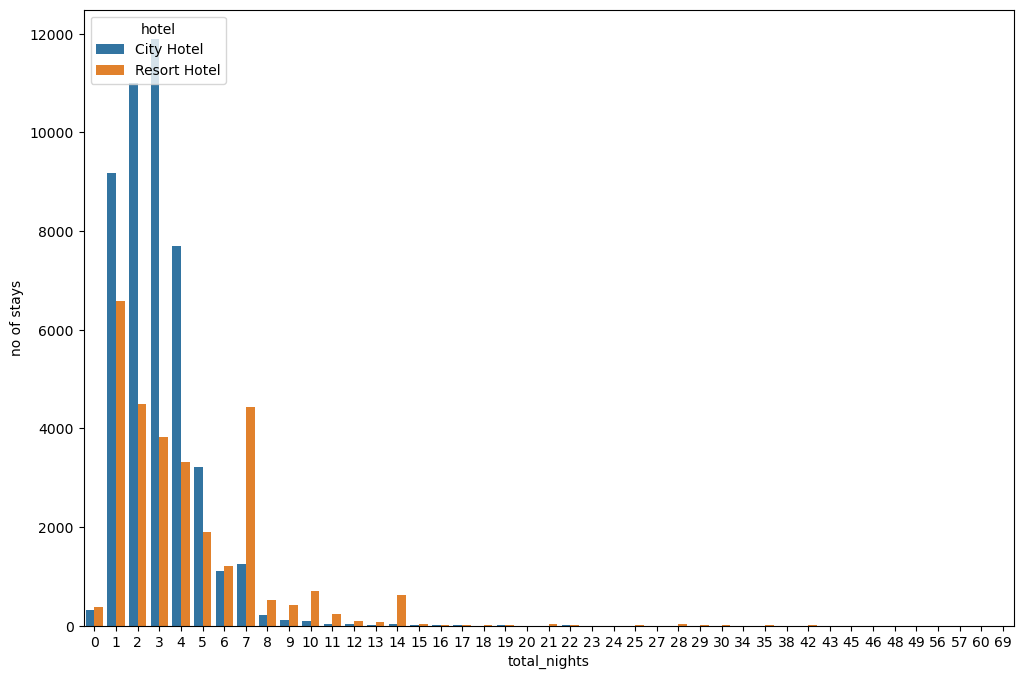

In [161]:
plt.figure(figsize=(12,8))
sns.barplot(x='total_nights',y='no of stays',hue='hotel',hue_order=['City Hotel','Resort Hotel'],data=stay)

In [163]:
clean_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'total_nights'],
      dtype='object')

In [164]:
clean_data['market_segment'].value_counts()

Online TA        35738
Offline TA/TO    15908
Direct           10672
Groups            7714
Corporate         4303
Complementary      646
Aviation           185
Name: market_segment, dtype: int64

In [166]:
px.pie(clean_data,values=clean_data['market_segment'].value_counts(), names=clean_data['market_segment'].value_counts().index,title='bookings per market segment' )

In [167]:
clean_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'total_nights'],
      dtype='object')

<AxesSubplot:xlabel='market_segment', ylabel='adr'>

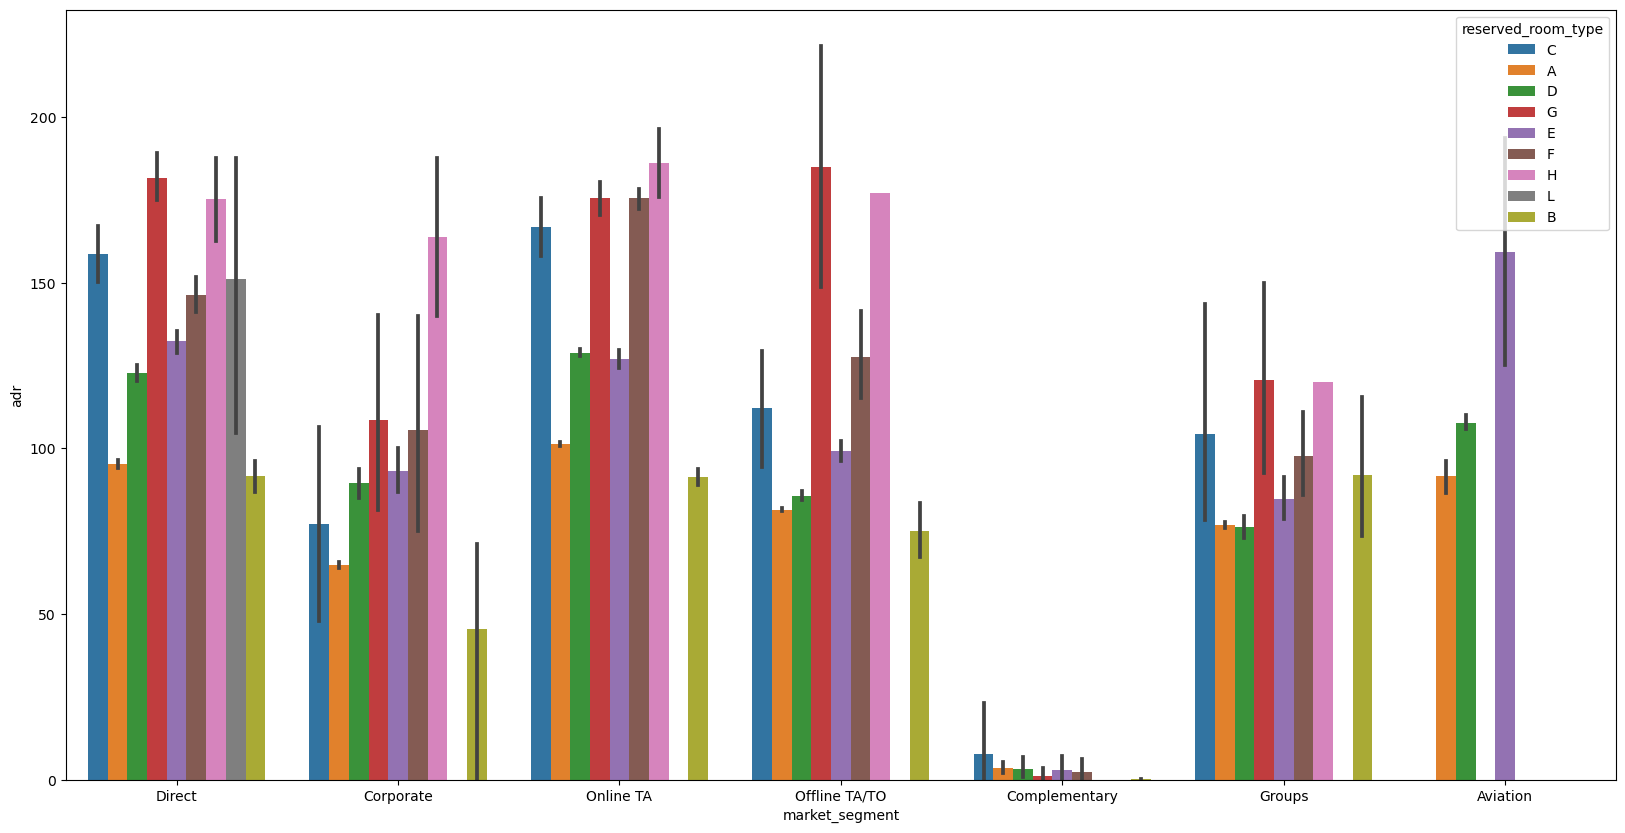

In [169]:
plt.figure(figsize=(20,10))
sns.barplot(x='market_segment', y='adr', hue='reserved_room_type',data=clean_data)

In [171]:
cancel=data[data['is_canceled']==1]
cancel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,0.0,0,Transient,82.0,0,1,Canceled,5/6/2015
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,0.0,0,Transient,105.5,0,0,Canceled,4/22/2015
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,...,No Deposit,240.0,0.0,0,Transient,123.0,0,0,Canceled,6/23/2015
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,...,No Deposit,240.0,0.0,0,Transient,107.0,0,2,Canceled,5/11/2015
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,...,No Deposit,0.0,0.0,0,Transient,108.3,0,2,Canceled,5/29/2015


In [172]:
len(cancel[cancel['hotel']=='Resort Hotel'])

11122

In [173]:
len(cancel[cancel['hotel']=='City Hotel'])

33102

In [175]:
px.pie(values=[11122,33102], names=['rh_cancellations','ch_cancellations'])

In [176]:
cancel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,0.0,0,Transient,82.0,0,1,Canceled,5/6/2015
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,0.0,0,Transient,105.5,0,0,Canceled,4/22/2015
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,...,No Deposit,240.0,0.0,0,Transient,123.0,0,0,Canceled,6/23/2015
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,...,No Deposit,240.0,0.0,0,Transient,107.0,0,2,Canceled,5/11/2015
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,...,No Deposit,0.0,0.0,0,Transient,108.3,0,2,Canceled,5/29/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110280,City Hotel,1,132,2017,April,17,25,0,0,0,...,No Deposit,9.0,0.0,0,Transient,0.0,0,3,Canceled,4/25/2017
111355,City Hotel,1,4,2017,June,23,5,1,0,1,...,No Deposit,0.0,238.0,0,Transient,65.0,0,0,Canceled,6/5/2017
111924,City Hotel,1,7,2017,May,22,31,0,1,1,...,No Deposit,0.0,238.0,0,Transient,65.0,0,0,Canceled,5/31/2017
111925,City Hotel,1,6,2017,July,29,17,1,0,1,...,No Deposit,0.0,238.0,0,Transient,65.0,0,0,No-Show,7/17/2017


In [210]:
months_cancelled = cancel['arrival_date_month'].value_counts().reset_index()

In [211]:
months_cancelled

,index,arrival_date_month
0,August,5239
1,July,4742
2,May,4677
3,June,4535
4,April,4524
5,October,4246
6,September,4116
7,March,3149
8,February,2696
9,December,2371


In [212]:
months_cancelled = months_cancelled.rename(columns={'index':'months','arrival_date_month':'no_of_times_booking_got_cancelled'})

In [213]:
months_cancelled

,months,no_of_times_booking_got_cancelled
0,August,5239
1,July,4742
2,May,4677
3,June,4535
4,April,4524
5,October,4246
6,September,4116
7,March,3149
8,February,2696
9,December,2371


In [214]:
import sort_dataframeby_monthorweek as sd

In [216]:
sd.Sort_Dataframeby_Month(df=months_cancelled,monthcolumnname= 'months' )

,months,no_of_times_booking_got_cancelled
0,January,1807
1,February,2696
2,March,3149
3,April,4524
4,May,4677
5,June,4535
6,July,4742
7,August,5239
8,September,4116
9,October,4246


In [217]:
px.bar(months_cancelled,x='months',y='no_of_times_booking_got_cancelled')